# Homework 2

In this assignment, we will explore computational aspects of matrix inversion and changes of basis.

In [1]:
# Import numpy to handle numerical linear algebra
import numpy as np

## Matrix Inversion

We introduced the the notion of an inverse matrix in class. This can be computed by hand (see your textbook), but we can also use built-in `numpy` functions to do it for us.

Consider the matrix `A` defined below.

In [2]:
A = np.array([[1,1,0,0],
              [2,0,2,0],
              [3,3,3,0],
              [0,0,4,4]])

print(A)

[[1 1 0 0]
 [2 0 2 0]
 [3 3 3 0]
 [0 0 4 4]]


**Problem 1** Figure out how to compute the inverse of `A`. Call the result `A_inv`. Verify that your result has the correct inverse property; i.e., show that `A` times `A_inv` returns the identity matrix. Print out your answers.

**General Remark:** To reiterate a comment from the last coding HW: when doing coding exercies, feel free to use any resources you like when completing these assignments (e.g., Google `numpy` documentation).

**Remark About Accuracy:** Due to numerical errors, you will frequently get a result which you *expect* to be zero, but which the computer tells you is some extremely small number (e.g., `1e-17`). Don't worry about these numerical errors. If they bother you too much, feel free to figure out how to round your answers when printing them.

In [ ]:
## Your Code for Problem 1 Goes Here

Next, consider the matrix `B` defined below.

In [8]:
B = np.array([[1,1,0,0],
             [2,0,-2,0],
             [2,0,0,2],
             [-1,-1,-2,-2]])

**Problem 2** Try computing the inverse of `B` using the same method from the last problem.

In [10]:
## Your Code for Problem 2 Goes Here

You will get an error!

Explain the mathematical reason that `B` is not invertible in the box below (convert it to a markdown cell and type your answer).

In [11]:
## Your Explanation for Problem 2 Goes Here

## Transformation Matrices and Change of Basis

Let $V = \mathbb{R}^3$ and let $W = \mathbb{R}^2$. Choose ordered bases
$$
B = \left(
\left[\begin{array}{c}
1 \\
0 \\
0 \end{array}\right],
\left[\begin{array}{c}
1 \\
1 \\
0 \end{array}\right],
\left[\begin{array}{c}
1 \\
1 \\
1 \end{array}\right]\right)
$$
for $V$, and 
$$
C = \left(\left[\begin{array}{c}
1 \\
1 \end{array} \right],
\left[ \begin{array}{c}
-1 \\
1 \end{array}\right] \right)
$$
for $W$.

Let $\Phi:V \to W$ be the linear transformation defined on the basis vectors of $B$ by
$$
\begin{align*}
\Phi \left(\left[\begin{array}{c}
1 \\
0 \\
0 \end{array}\right] \right)  &= \left[\begin{array}{c}
1 \\
0  \end{array}\right] \\
\Phi \left(\left[\begin{array}{c}
1 \\
1 \\
0 \end{array}\right] \right)  &= \left[\begin{array}{c}
-2 \\
-1 \end{array}\right] \\
\Phi \left(\left[\begin{array}{c}
1 \\
1 \\
1 \end{array}\right] \right)  &= \left[\begin{array}{c}
1 \\
5  \end{array}\right] \\
\end{align*}
$$

**Problem 3** Create the transformation matrix for $\Phi$ with respect to the bases $B$ and $C$. Call the matrix `A_Phi` in your code; we will denote it $A_\Phi$ in the text below. Print your answer.

In [16]:
## Your Code for Problem 3 Goes Here

Now suppose that we have another basis $\overline{B}$ for $V$ and another basis $\overline{C}$ for $W$. Theorem 2.20 from the text book gives a formula for computing the tranformation matrix for $\Phi$ with respect to these new bases---call this matrix $\overline{A}_\Phi$. The formula is 
$$
\overline{A}_\Phi = T^{-1} A_\Phi S,
$$
where $S$ is the transformation matrix for the identity map $\mathrm{id}_V$ with respect to the bases $\overline{B}$ and $B$ and $T$ is the transformation for the identity map $\mathrm{id}_W$ with respect to the bases $\overline{C}$ and $C$. $T^{-1}$ is the matrix inverse of $T$.

**Note:** This formula holds in general, not just for the specific example we are looking at!

**Problem 4** Let $\overline{B}$ be the standard basis for $\mathbb{R}^3$ and $\overline{C}$ the standard basis for $\mathbb{R}^2$. Construct the matrices $S$ and $T$ from the formula for our specific example; call them `S` and `T` in your code. Use these matrices to construct $\overline{A}_\Phi$ using the formula above; call your answer `A_Phi_bar`. Print your answers `S`, `T` and `A_Phi_bar`.

In [14]:
## Your Code for Problem 4 Goes Here

## Principal Component Analysis

In this section, we will give a brief introduction to a tool which is ubiquitous in data science: principal component analysis. To start, we'll creat a toy data set.

In [84]:
# import matplotlib for plotting
import matplotlib.pyplot as plt

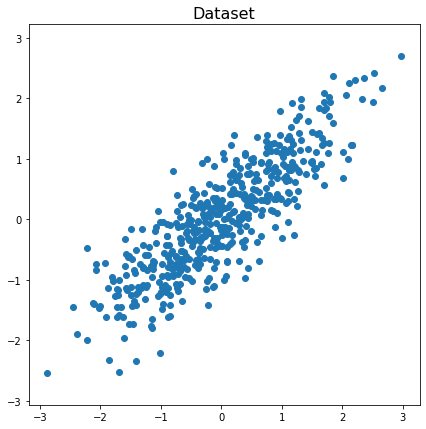

In [85]:
N = 500 # Number of points to sample
m = 0.8 # Slope

xs = np.random.normal(0,1,N)
ys = m*xs + np.random.normal(0,0.5,N)

plt.figure(figsize = (7,7))
plt.scatter(xs,ys)
plt.title('Dataset',fontsize = 16)
plt.axis('equal')
plt.show()

Now imagine that each dot in this 'point cloud' is a data point. In practice, data would be high dimensional and hard to visualize, so it is frequently useful to find a 'good basis' which captures the variability of the data. Intuitively, a good basis should line up with the line along which this point cloud appears to be clustered. Such a good basis is frequently used for 'dimension reduction': one can project the data onto a small number of directions which are able to capture the general shape of the data.

One process for finding a good basis is called Principal Component Analysis. We will cover the theory behind this in detail in the next few weeks of the course. For now, we will use a 'black box' algorithm to find the basis.

In [86]:
# Import the PCA module from the sklearn package
from sklearn.decomposition import PCA

X = np.column_stack((xs,ys))
pca = PCA(n_components=2) 
pca.fit(X)
eVec = pca.components_ # New basis vectors
eVals = pca.singular_values_

We plot the point cloud below, with our new PCA basis drawn over the top. The basis vectors have been scaled according to the variability that they capture (using the `eVals` data from the PCA computation).

Observe that the new basis aligns very well with the point cloud.

In [87]:
eVals

array([29.9404342 ,  8.37957803])

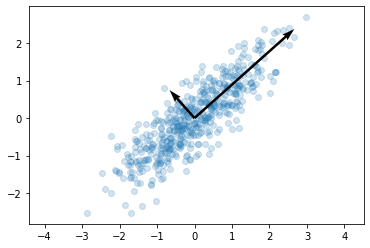

In [88]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

# Syntax for quiver:
# plt.quiver(xVal for basepoint, yVal for basepoint, xVal for vector, yVal for vector, scale = )
plt.quiver(0, 0, eVals[0]*eVec[0,0], eVals[0]*eVec[0,1], scale=75)
plt.quiver(0, 0, eVals[1]*eVec[1,0], eVals[1]*eVec[1,1], scale=75)

plt.axis('equal');

**Problem 5** Play around with the various parameters in the code for this section and try to figure out what they do. **You don't have to turn in an answer for this problem.** 